<a href="https://colab.research.google.com/github/Developer-Abnam/bootstrap/blob/main/02_mlzoomcamp_linearregression_homework_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2nd Week Assignment - Abdulsamad Nuradeen

In [26]:
import pandas as pd
import numpy as np

In [27]:
data='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [28]:
!wget $data

--2025-09-30 05:03:00--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-09-30 05:03:00 (18.6 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [29]:
df = pd.read_csv(data)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [30]:
string_cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_cols:
  df[col] = df[col].str.lower().str.replace(' ', '_')

# Feature Selection

In [31]:
df_selected = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_selected

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

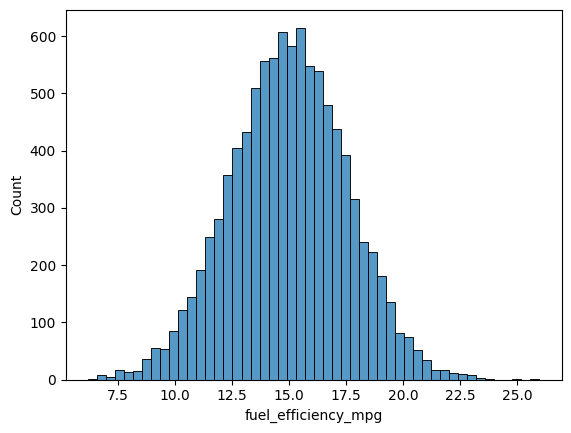

In [33]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

# Question 1

There's one column with missing values. What is it?

In [34]:
df_selected.isna().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


# Question 2

What's the median (50% percentile) for variable 'horsepower'?

In [35]:
df_selected['horsepower'].median()
#or
df_selected['horsepower'].quantile(0.5)

np.float64(149.0)

# Prepare and split the dataset

In [52]:
def split_dataset(df, seed=42):
    np.random.seed(seed) # Setting for reproducibility

    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].copy()

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test

n = len(df_selected)
df_train, df_val, df_test = split_dataset(df_selected)

print(f"""The training set represent {(len(df_train)*100/n)}%.
The validation set represent {len(df_val)*100/n}%.
The testing set represent {len(df_test)*100/n}%.""")

The training set represent 60.01648804616653%.
The validation set represent 19.991755976916735%.
The testing set represent 19.991755976916735%.


# Question 3


*  We need to deal with missing values for the column from Q1.


*   We have two options: fill it with 0 or with the mean of this variable.
*   Try both options. For each, train a linear regression model without regularization using the code from the lessons.



*   For computing the mean, use the training only!
*   Use the validation dataset to evaluate the models and compare the RMSE of each option.


*   Round the RMSE scores to 2 decimal digits using round(score, 2)
*   Which option gives better RMSE?



















# Filling with missing values

Fillna with mean value

In [37]:
def fill_na(df_train, df_val, df_test, value=None):
  df_train = df_train.fillna(value)
  df_val = df_val.fillna(value)
  df_test = df_test.fillna(value)
  return df_train, df_val, df_test

df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=df_train['horsepower'].mean())



# Extracting X(Feature) and y(target)

In [38]:
def extract_X_y(df_train, df_val, df_test, target='fuel_efficiency_mpg'):
    X_train = df_train.drop([target], axis=1).values
    y_train = df_train[target].values

    X_val = df_val.drop([target], axis=1).values
    y_val = df_val[target].values

    X_test = df_test.drop([target], axis=1).values
    y_test = df_test[target].values

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test)

# Linear Regression

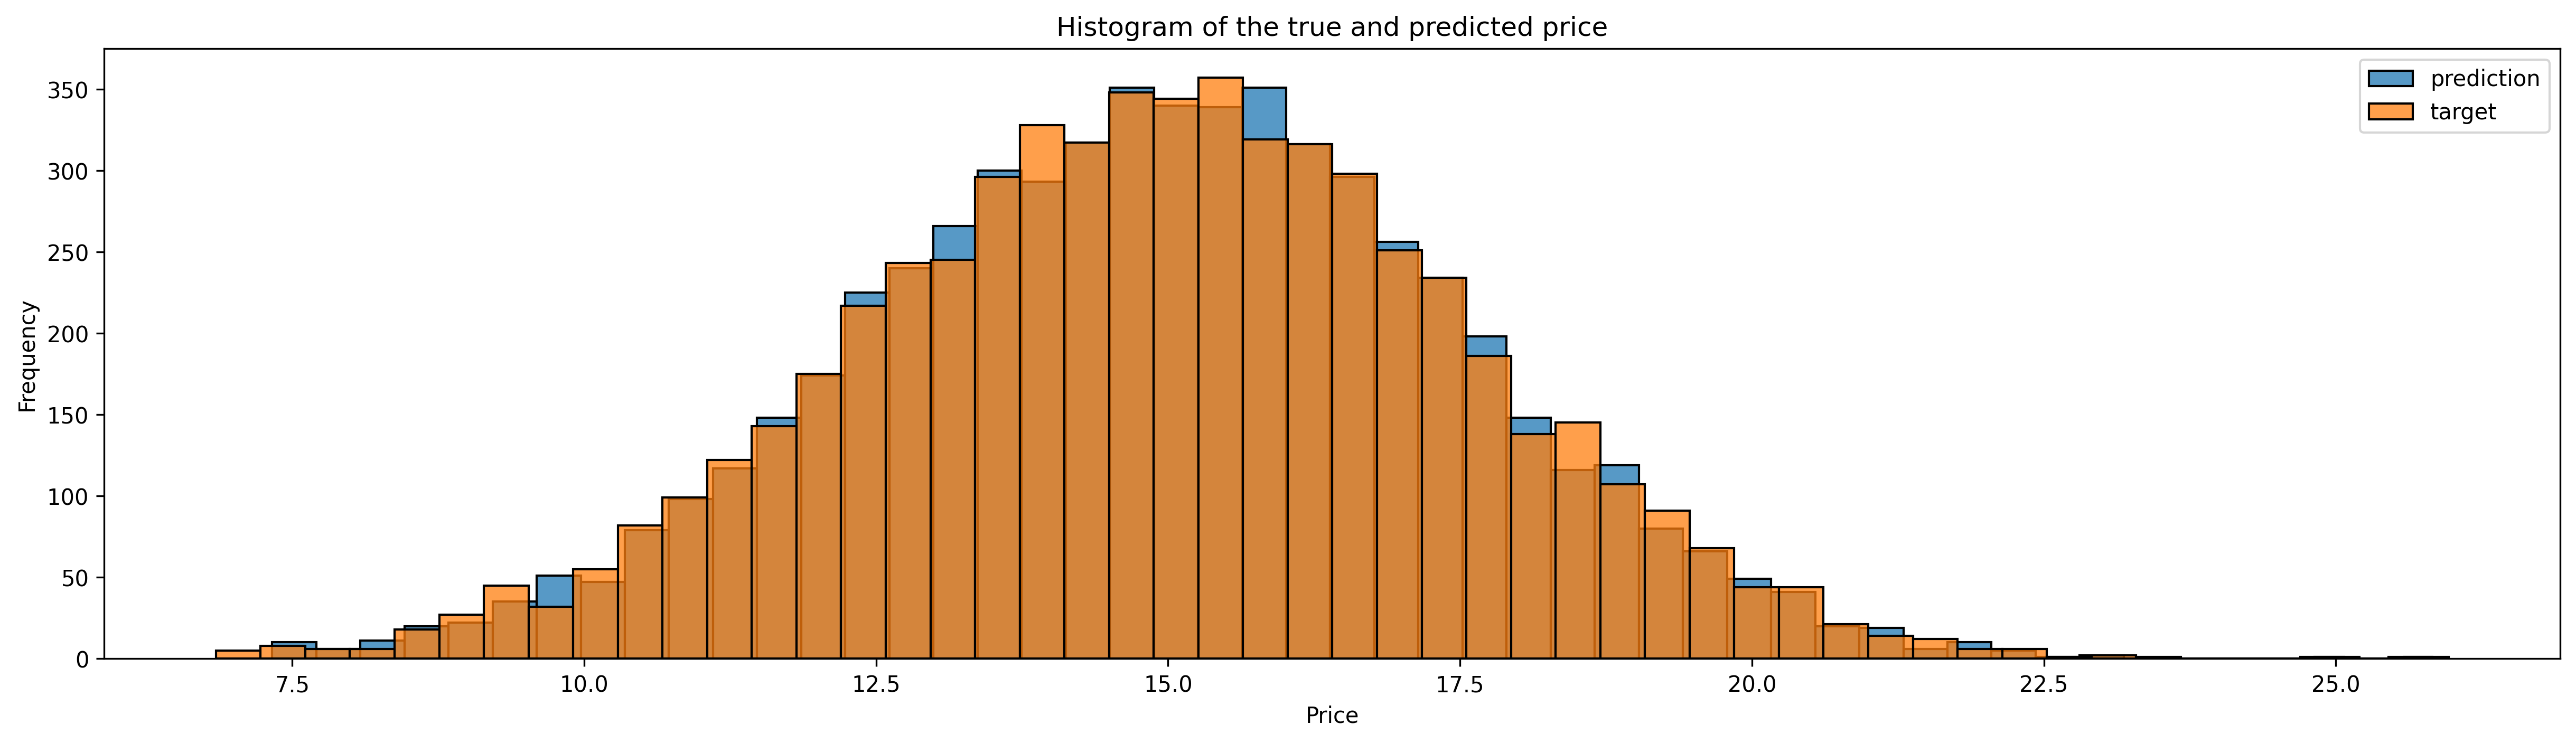

In [53]:
def train_linear_regression(X, y):
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   XTX = X.T.dot(X)
   XTX_inv = np.linalg.inv(XTX)
   w_full = XTX_inv.dot(X.T).dot(y)

   return w_full[0], w_full[1:]

def linear_regression(X,w):
  return w[0] + X.dot(w[1:])

class LinearRegressor():
  def __init__(self):
    self.w = 0

  def fit(self, X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    self.w = XTX_inv.dot(X.T).dot(y)
    return
  def predict(self, X):
    return self.w[0] + X.dot(self.w[1:])

df_train, df_val, df_test = split_dataset(df_selected)
df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=df['horsepower'].mean())
X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test)

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted price")
plt.legend();



In [54]:
def RMSE(y, y_pred):
  error = y_pred - y
  mse = (error**2).mean()
  return np.sqrt(mse)

y_pred = lr.predict(X_val)
rmse_fillna_mean = round(RMSE(y_val, y_pred), 2)
rmse_fillna_mean

np.float64(0.46)

Fillna is zero

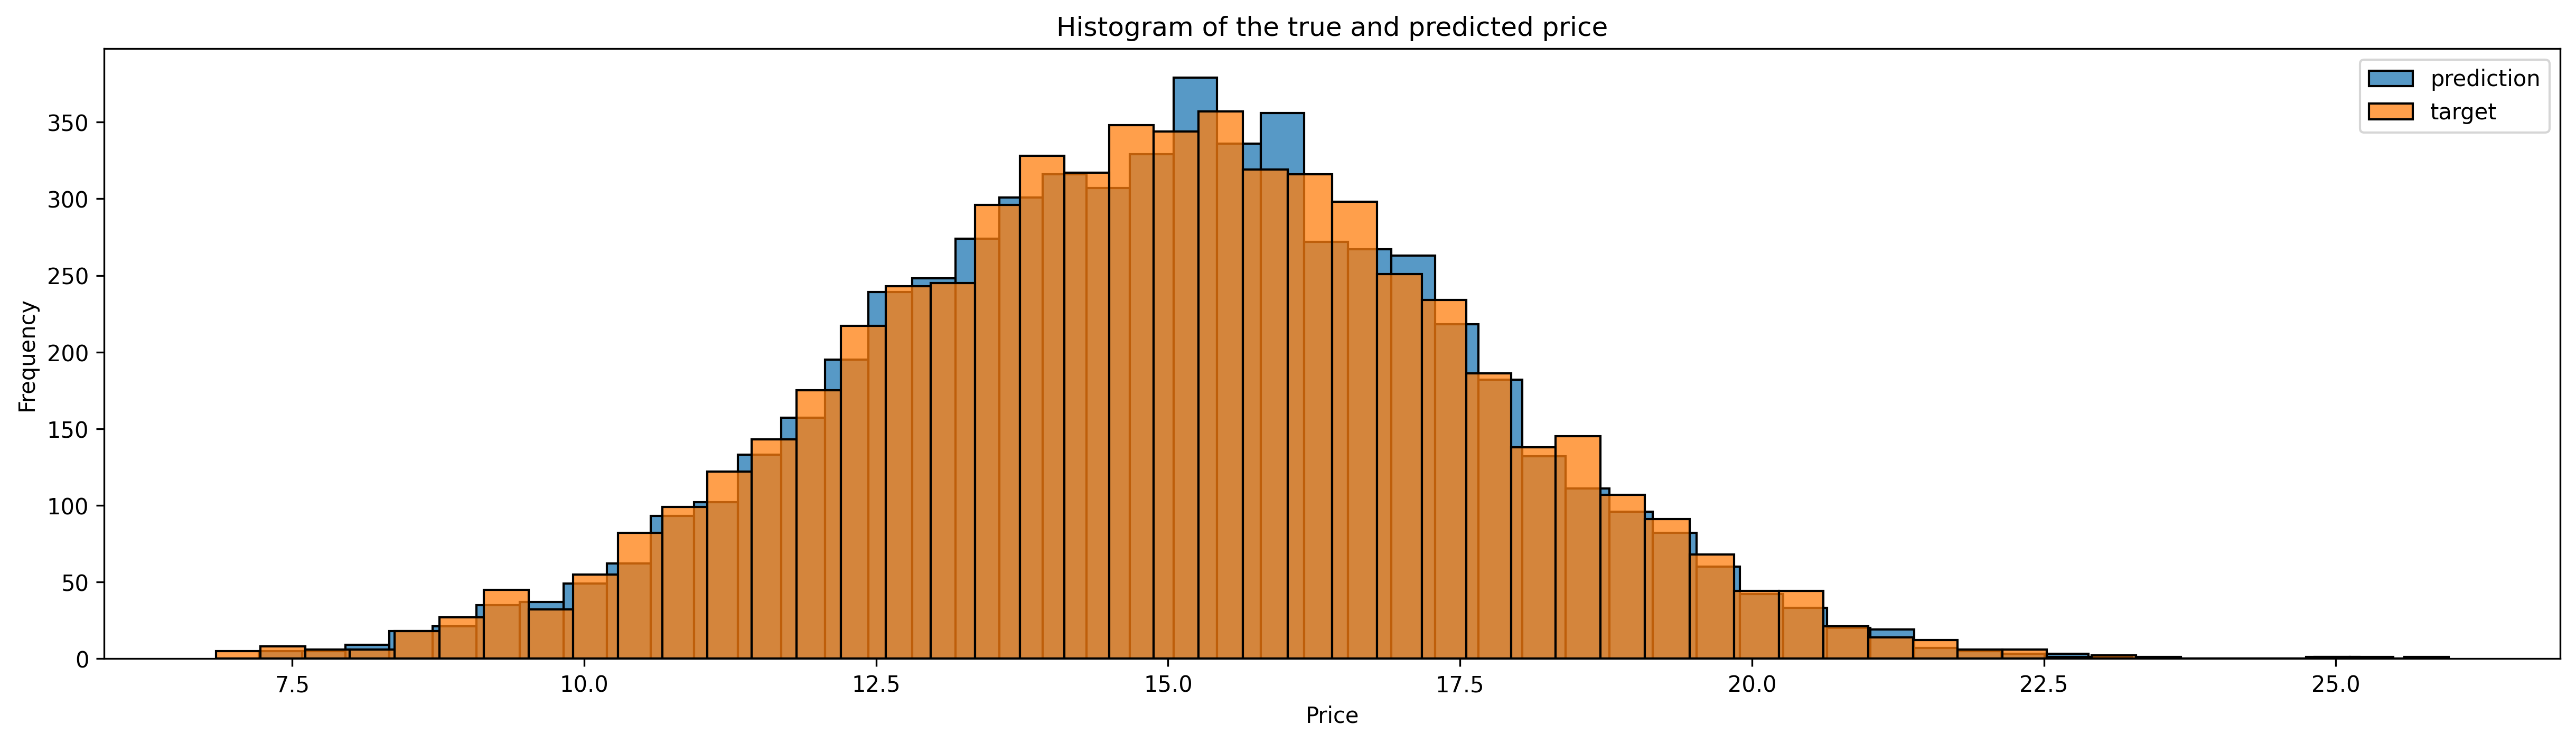

In [55]:
df_train, df_val, df_test = split_dataset(df_selected)
df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test)

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted price")
plt.legend();

In [56]:
y_pred = lr.predict(X_val)
rmse_fillna_zero = round(RMSE(y_val, y_pred), 2)
rmse_fillna_zero

np.float64(0.52)

RMSE - fillna is zero

In [57]:
print(f"RMSE with NA values filled with zero is {rmse_fillna_zero}.\nRMSE with NA values filled with the mean is {rmse_fillna_mean}.")

RMSE with NA values filled with zero is 0.52.
RMSE with NA values filled with the mean is 0.46.


# Question 4

*   Now let's train a regularized linear regression.
*   For this question, fill the NAs with 0.
*   Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
*   Use RMSE to evaluate the model on the validation dataset.
*   Round the RMSE scores to 2 decimal digits.
*   Which r gives the best RMSE?





# Regularization

In [58]:
def linear_regression_reg(X, y, r=0.0):
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   XTX = X.T.dot(X)
   reg = r * np.eye(XTX.shape[0])
   XTX_inv = np.linalg.inv(XTX + reg)
   w = XTX_inv.dot(X.T).dot(y)

   return w

class LinearRegressor():
    def __init__(self, r=0):
        self.w = 0
        self.r = r

    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        reg = self.r * np.eye(XTX.shape[0])
        XTX_inv = np.linalg.inv(XTX + reg)
        self.w = XTX_inv.dot(X.T).dot(y)
        return

    def predict(self, X):
        return self.w[0] + X.dot(self.w[1:])

In [59]:
r = [0, 0.01, 0.1, 1, 10, 100]
for ri in r:
  lr = LinearRegressor(r=ri)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_train)
  print(f"For r={ri} -> RMSE = {round(RMSE(y_train, y_pred), 2)}")

For r=0 -> RMSE = 0.52
For r=0.01 -> RMSE = 0.52
For r=0.1 -> RMSE = 0.52
For r=1 -> RMSE = 0.53
For r=10 -> RMSE = 0.53
For r=100 -> RMSE = 0.53


# Showing Regularization

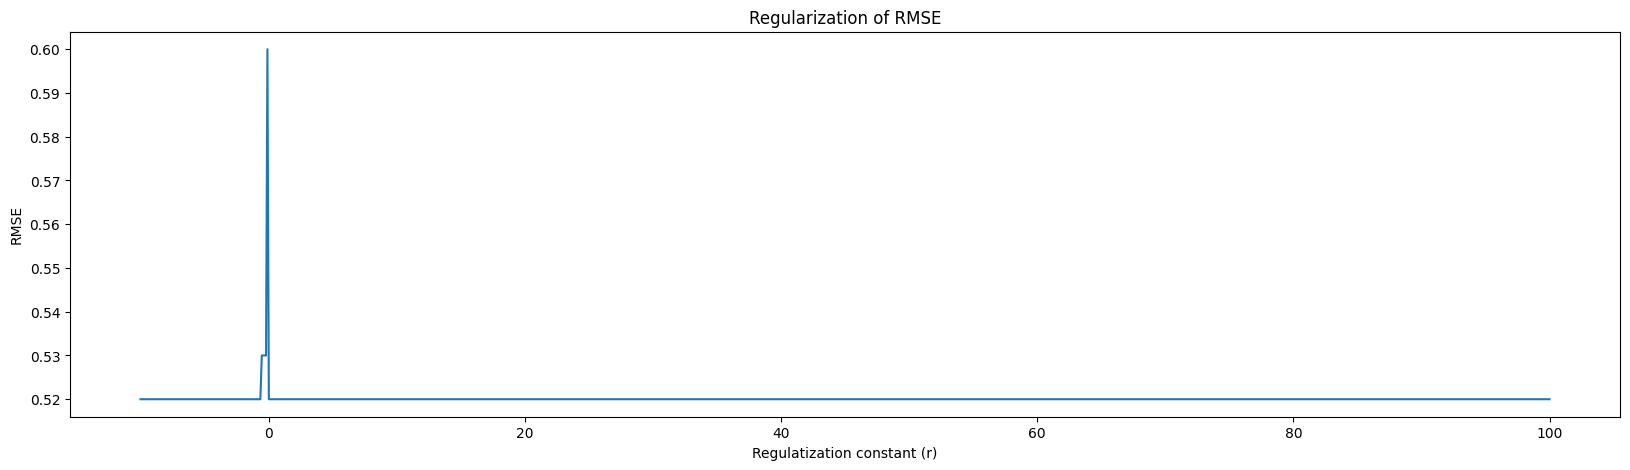

In [62]:
r = np.linspace(-10, 100, 1000)
rmse = []
for ri in r:
  lr = LinearRegressor(r=ri)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_val)

  rmse.append(round(RMSE(y_val, y_pred), 2))

plt.figure(figsize=(20, 5))
sns.lineplot(x=r, y=rmse)
plt.xlabel('Regulatization constant (r)')
plt.ylabel('RMSE')
plt.title('Regularization of RMSE');

The Historical of the Optimal Regularization value

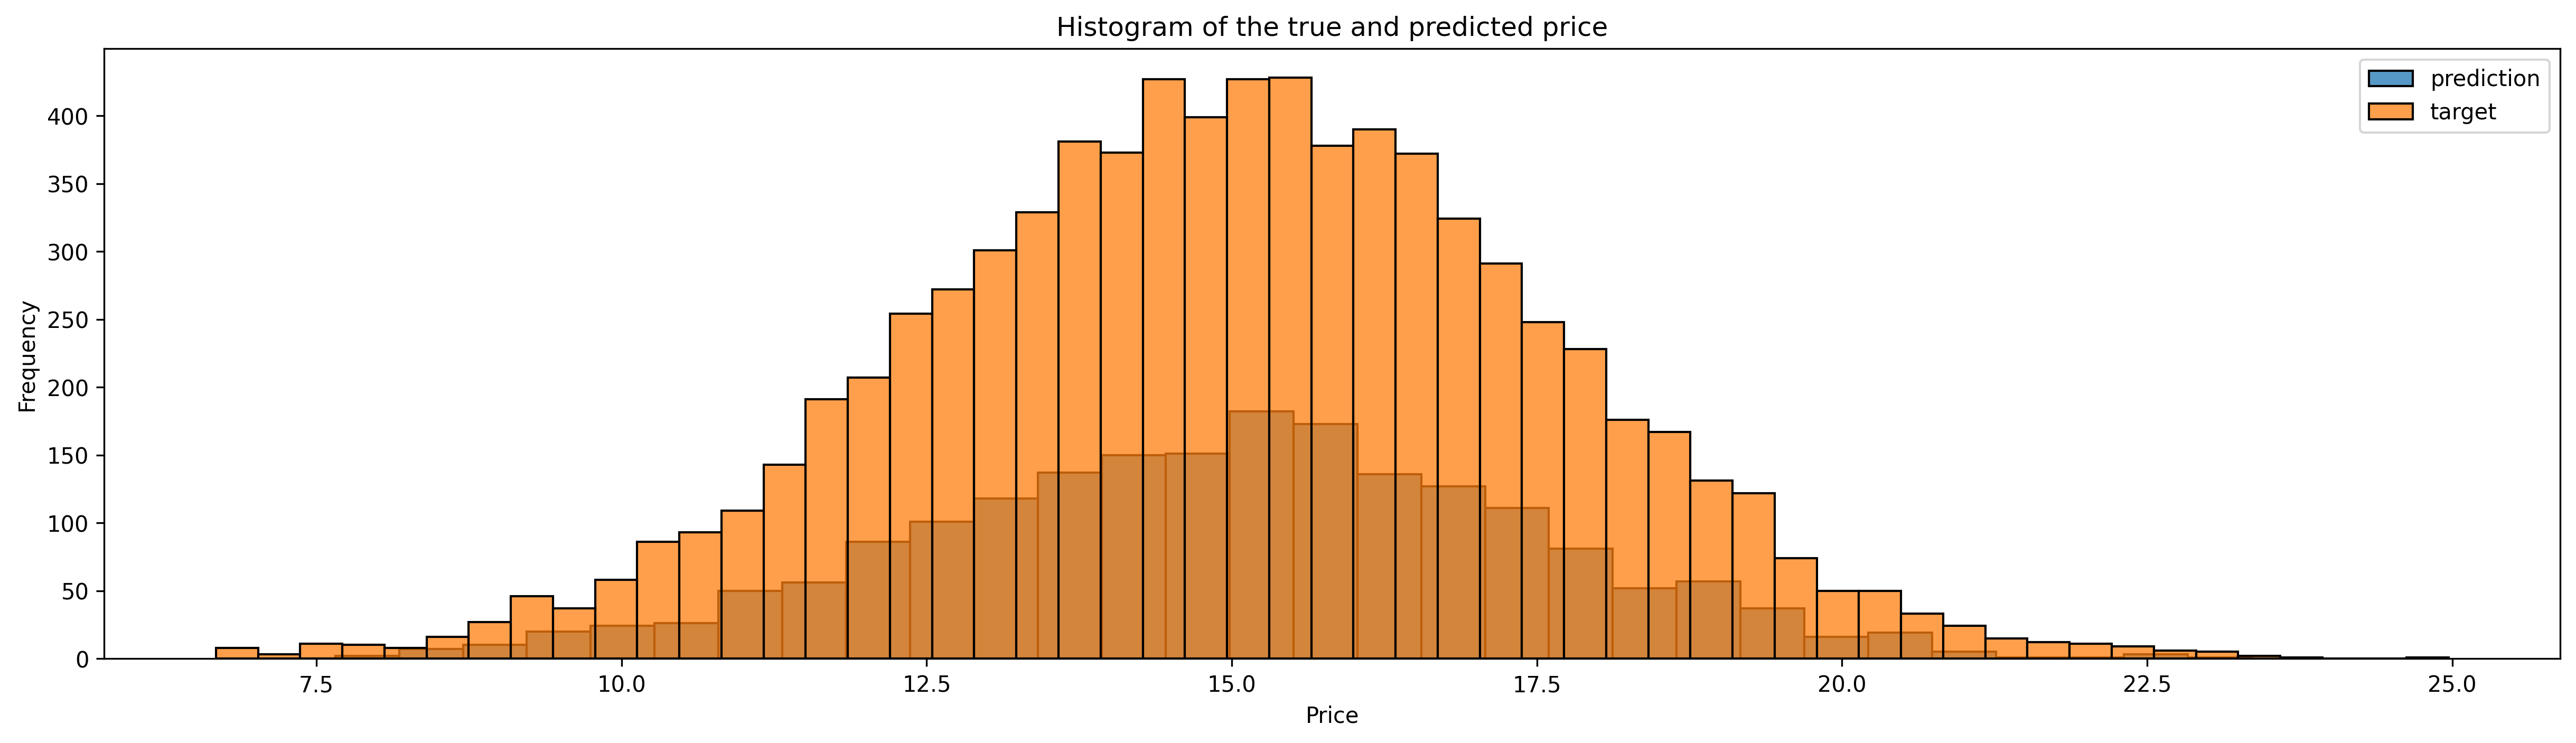

In [68]:
lr = LinearRegressor(r=0.01)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
rmse.append(round(RMSE(y_val, y_pred), 2))

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted price")
plt.legend();

# Question 5

*   We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
*   Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
*   For each seed, do the train/validation/test split with 60%/20%/20% distribution.
*   Fill the missing values with 0 and train a model without regularization.
*   For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
*   What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
*   Round the result to 3 decimal digits (round(std, 3))



In [69]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse = []

for seed_i in seed:
    df_train, df_val, df_test = split_dataset(df_selected, seed_i)
    df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
    X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test)

    lr = LinearRegressor()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    rmse.append(RMSE(y_val, y_pred))

round(np.std(rmse), 3)

np.float64(0.007)

# Quetion 6


*   Split the dataset like previously, use seed 9.
*   Combine train and validation datasets.
*   Fill the missing values with 0 and train a model with r=0.001.
*   What's the RMSE on the test dataset?





In [66]:
df_train, df_val, df_test = split_dataset(df_selected, seed=9)
df_train = pd.concat([df_train, df_val])
df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test)

lr = LinearRegressor(r=0.001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
round(RMSE(y_test, y_pred), 2)

np.float64(0.52)